In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv('../data/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [71]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [72]:
X = df['Resume']
y = df['Category']

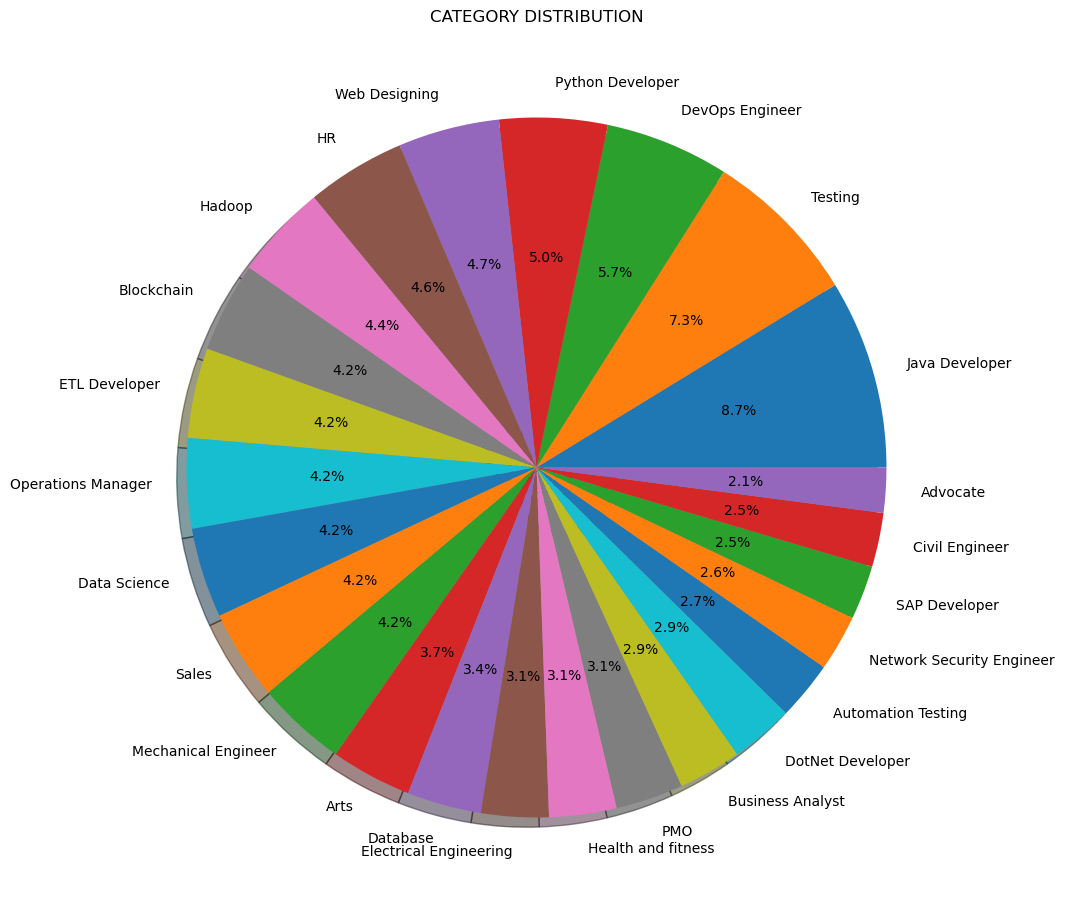

In [73]:
from matplotlib.gridspec import GridSpec

target_counts  = df['Category'].value_counts()
target_labels  = df['Category'].value_counts().index

# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2,2)

plt.subplot(the_grid[0,1], aspect=1, title='CATEGORY DISTRIBUTION')
plt.pie(target_counts, labels=target_labels, autopct='%1.1f%%', shadow=True);

In [74]:
import re

def clean_resume(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    return resume_text

In [75]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [76]:
# !pip install wordcloud

In [77]:
stopwords = stopwords.words('english')
total_words = []
sentences = df['Resume'].values
cleaned_sentences = ""
for i in range(0,160):
    cleaned_text = clean_resume(sentences[i])
    cleaned_sentences += cleaned_text
    required_words = nltk.word_tokenize(cleaned_text)
    for word in required_words:
        if word.lower() not in stopwords and word.lower() not in string.punctuation:
            total_words.append(word.lower())

In [78]:
len(total_words)

33270

In [79]:
word_freq_dist = nltk.FreqDist(total_words)
most_common = word_freq_dist.most_common(50)
most_common

[('details', 488),
 ('exprience', 446),
 ('data', 416),
 ('company', 398),
 ('months', 394),
 ('description', 358),
 ('1', 290),
 ('project', 254),
 ('year', 252),
 ('january', 216),
 ('learning', 210),
 ('science', 208),
 ('less', 204),
 ('skill', 190),
 ('python', 176),
 ('maharashtra', 166),
 ('6', 164),
 ('machine', 156),
 ('education', 146),
 ('college', 146),
 ('arts', 144),
 ('university', 140),
 ('skills', 134),
 ('development', 134),
 ('web', 134),
 ('like', 126),
 ('analytics', 120),
 ('india', 120),
 ('management', 120),
 ('application', 120),
 ('team', 116),
 ('software', 116),
 ('using', 110),
 ('business', 108),
 ('sql', 104),
 ('developed', 104),
 ('monthscompany', 102),
 ('time', 100),
 ('used', 98),
 ('b', 98),
 ('c', 98),
 ('experience', 96),
 ('mumbai', 96),
 ('projects', 94),
 ('knowledge', 94),
 ('analysis', 92),
 ('technologies', 92),
 ('hr', 92),
 ('engineering', 90),
 ('pune', 90)]

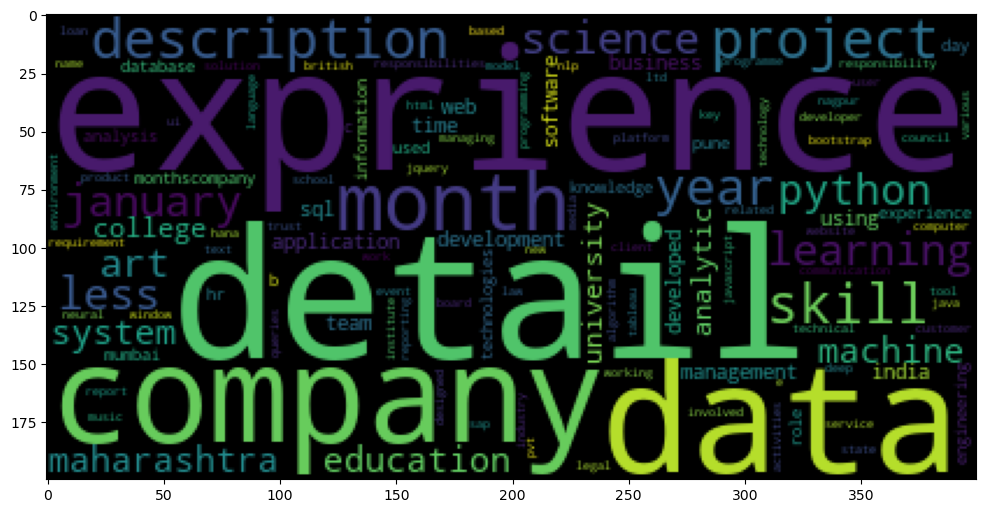

In [80]:
wc1 = WordCloud(collocations=False).generate(" ".join(total_words))
plt.figure(figsize=(12, 12))
plt.imshow(wc1)
plt.savefig('word_cloud.jpg')

## TF*IDF Vectorizer

In [81]:
y = df['Category']
x = df['Resume']

cleaned = x.apply(lambda a: clean_resume(a))

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

x_vect = tfidf.fit_transform(cleaned)
x_vect.shape

(962, 7566)

## Cross Validation

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_vect, y, test_size=0.25, random_state=42, stratify=y)
X_train.shape, X_test.shape

((721, 7566), (241, 7566))

## Build the Model

In [84]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()

clf.fit(X_train, y_train)

NearestCentroid()

In [85]:
y_pred = clf.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

0.975103734439834
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       0.86      1.00      0.92         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      1.00      1.00        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         7
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1

In [87]:
with open('../data/Sample_resume.txt') as file:
    data = file.read()

In [90]:
data = clean_resume(data)
data

'Tejashree Pishe Jr Machine Learning Engineer MITU Research EXPERIENCE MITU Research New Sangavi Pune Feb 2021 till date Hiko Technology Pvt Ltd Baner Pune Full Time Internship August 2019 May 2020 KEY PROJECTS Predictive Analytics Implemented for Pistachio Types over quality parameter database Study the origin trade business and nutritional values over Pistachio types Review the quality of pistachio types over its quality pararameters Critically evaluate and data preprocessing over the database Used the Resampling techniques to work on imbalanced data set Identify the quality parameters which has more impact on classification of Pistachio types by quantitative analysis Find out the best suitable algorithm with more than 90 a uracy to predict the type of pistachio over new data Updating and upgrading the model with non predictable data Technologies Python for Data Science NumPY Panda Machine Learning Algorithms Design and development of Decision support System for selection of New Resu

In [91]:
data = tfidf.transform([data])

y_pred1 = clf.predict(data)
y_pred1

array(['Data Science'], dtype=object)